 # ☆ Exploratory Data Analysis On CarDekho Dataset

- This dataset is collected from kaggle a well-known data community.
 - This dataset contains the data about Used-Cars for sale.
 - Aim of this analyis is to get possible insights from the data.

## > Importing required libraries

In [43]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')

## > Loading the dataset using pandas

In [44]:
df = pd.read_csv(r"C:\Users\Hrith\Downloads\archive\Car details v3.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [45]:
df.shape

(8128, 13)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## > Percentage of Null values in all columns

In [47]:
percentage_null = df.isnull().mean()*100
print(percentage_null)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


## > Graphical representation of null values

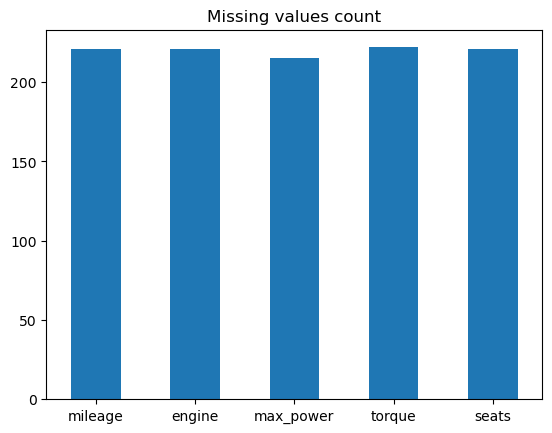

In [48]:
null_counts = df.isnull().sum()
null_graph = null_counts[null_counts > 0]
null_graph.plot.bar(title = 'Missing values count',y = 'Columns', x = 'Missing Count',rot = 0)
plt.show()

## > Dropping duplicated rows

In [49]:
ind = df[df.duplicated() == True].index
df = df.drop(ind)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [50]:
check = df[df.duplicated()  == True]
check

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


## > Creating 'Brand' column for differentiating Car brand

In [51]:
values = df['name'].str.split(" ").str[0]
df.rename(columns = {'name': 'Car_name'},inplace = True)
df.insert(1,"Brand",values)
df

,Car_name,Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


## > Deleting the 'Torque' column due to inconsistent data

In [52]:
del df['torque']

## > Removing the special characters from each column listed and changing data type

In [53]:
a = ['mileage', 'engine', 'max_power','seats']
for i in a:
    df[i] = df[i].fillna(0)
    df[i] = df[i].replace("","0")
for i in a:
    df[i] = df[i].replace(r'[^\d.]+','',regex = True)
df.rename(columns={'mileage': 'mileage_km','engine':'engine_CC','max_power' : 'max_power_bhp'}, inplace=True)

df['mileage_km'] = pd.to_numeric(df['mileage_km'])
df['engine_CC'] = pd.to_numeric(df['engine_CC'])
df['max_power_bhp'] = pd.to_numeric(df['max_power_bhp'])


## > Filling the missing values with median value

In [54]:
b = df.select_dtypes(include=['int64', 'float64']).columns
for i in b:
    df[i] = df[i].fillna(df[i].median())
    df[i]=df[i].replace(0,df[i].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       6926 non-null   object 
 1   Brand          6926 non-null   object 
 2   year           6926 non-null   int64  
 3   selling_price  6926 non-null   int64  
 4   km_driven      6926 non-null   int64  
 5   fuel           6926 non-null   object 
 6   seller_type    6926 non-null   object 
 7   transmission   6926 non-null   object 
 8   owner          6926 non-null   object 
 9   mileage_km     6926 non-null   float64
 10  engine_CC      6926 non-null   int64  
 11  max_power_bhp  6926 non-null   float64
 12  seats          6926 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 757.5+ KB


In [55]:
df.dtypes

Car_name          object
Brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage_km       float64
engine_CC          int64
max_power_bhp    float64
seats            float64
dtype: object

In [56]:
df

,Car_name,Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_km,engine_CC,max_power_bhp,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0
8123,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0


## > Checking Outliers and Dropping respective rows

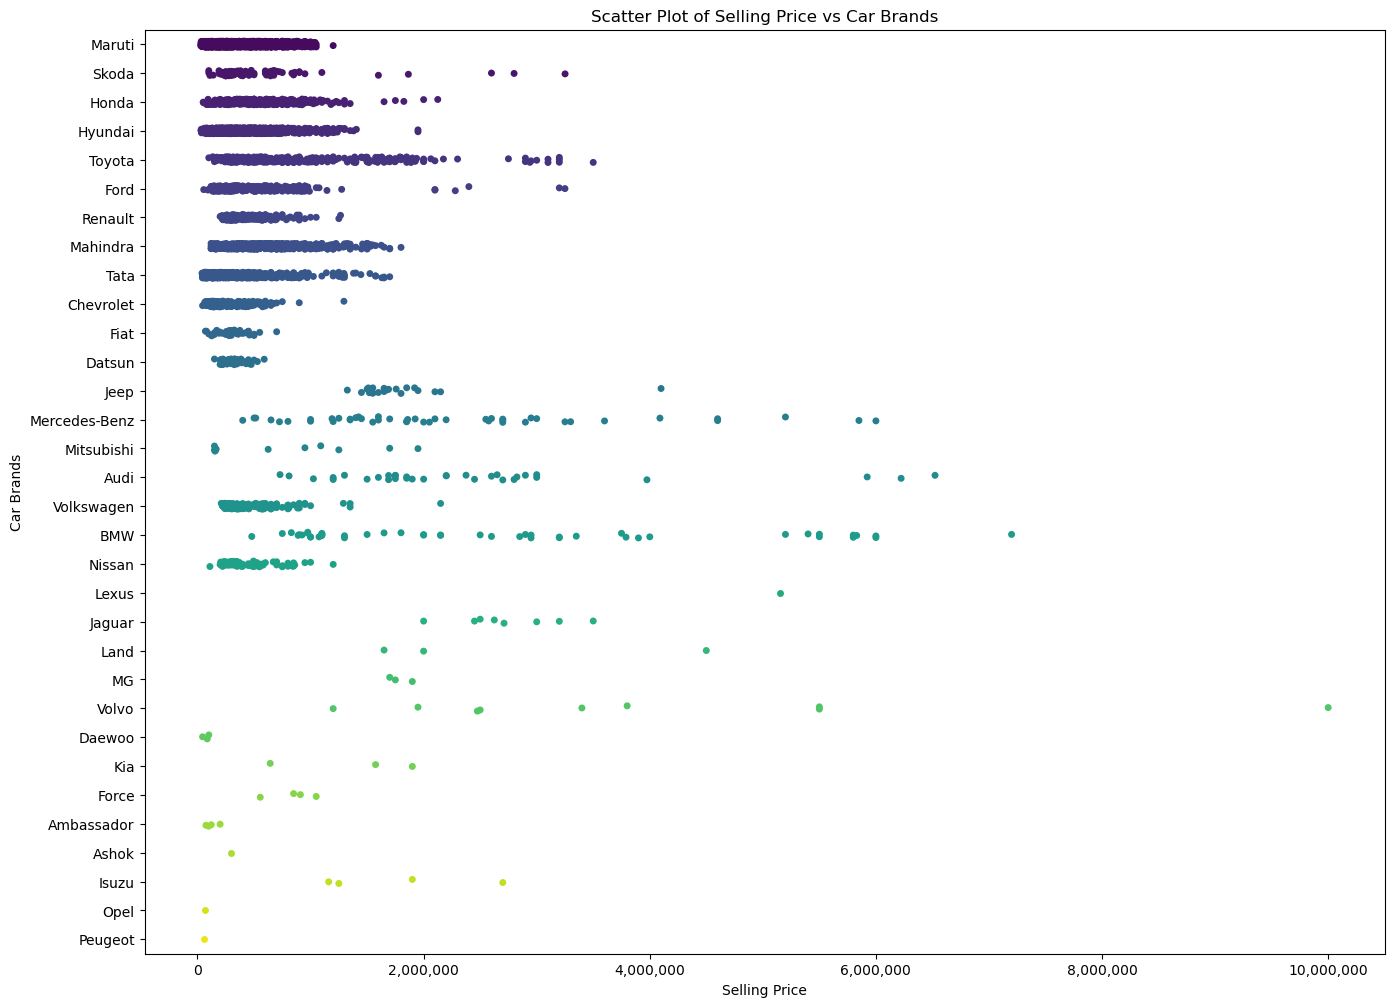

In [57]:

plt.figure(figsize=(16, 12))
sns.stripplot(y='Brand', x='selling_price', data=df, jitter=True, palette='viridis')
plt.title("Scatter Plot of Selling Price vs Car Brands")
plt.xlabel("Selling Price")
plt.ylabel("Car Brands")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()


In [58]:
index_to_drop = df[df['selling_price']>7000000].index
df.drop(index_to_drop,inplace = True)

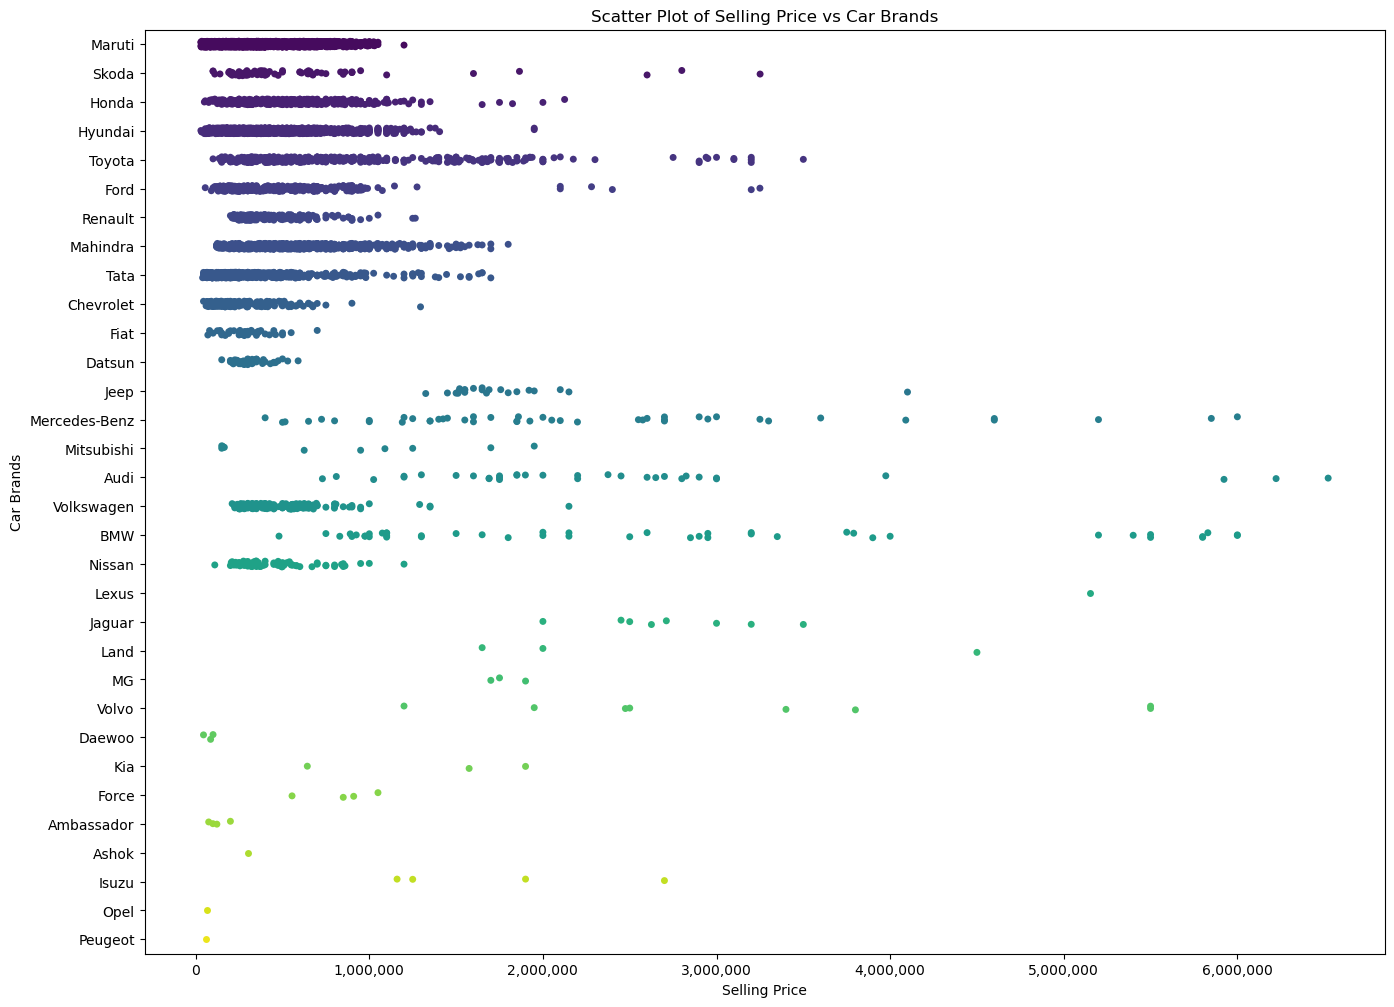

In [59]:
plt.figure(figsize=(16, 12))
sns.stripplot(y='Brand', x='selling_price', data=df, jitter=True, palette='viridis')
plt.title("Scatter Plot of Selling Price vs Car Brands")
plt.xlabel("Selling Price")
plt.ylabel("Car Brands")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()


- ### Removing cars which are built before 2002 Because the life span of a car will be around 15 to 20 years

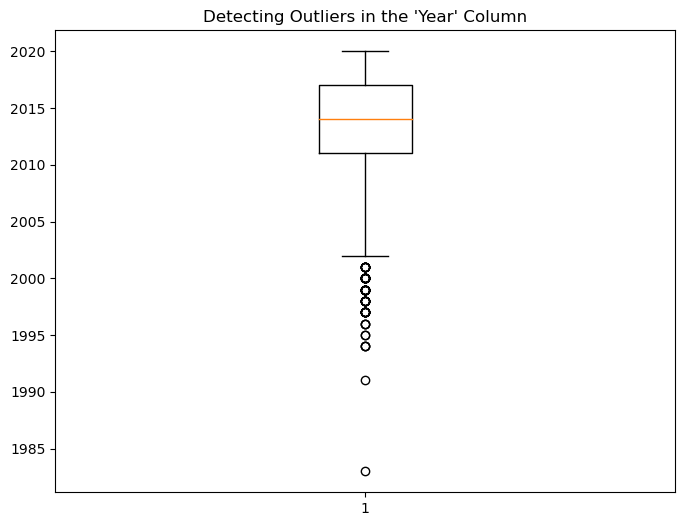

In [60]:
plt.figure(figsize=(8,6))
plt.boxplot(df.year)
plt.title("Detecting Outliers in the 'Year' Column")
plt.show()

In [61]:
d_ind = df[df['year']<2002].index
df.drop(d_ind,inplace = True)


- ### Removing the cars which are driven more than 200000 Km. Because the life span of engine will reduce if it has driven more than the ideal KM

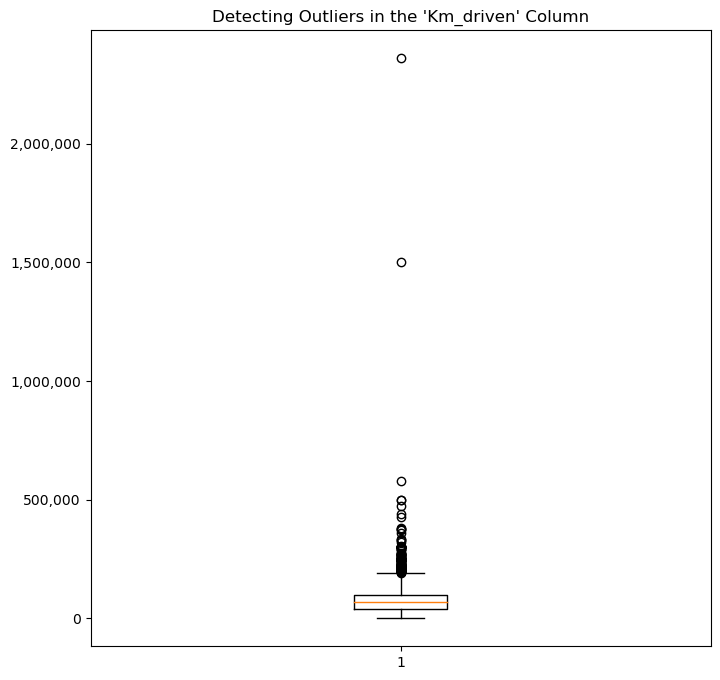

In [62]:
plt.figure(figsize=(8,8))
plt.boxplot(df.km_driven)
plt.title("Detecting Outliers in the 'Km_driven' Column")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

In [63]:
d_ind = df[df['km_driven']>200000].index
df.drop(d_ind,inplace = True)


## > Checking If Selling price vary by mileage of the Car

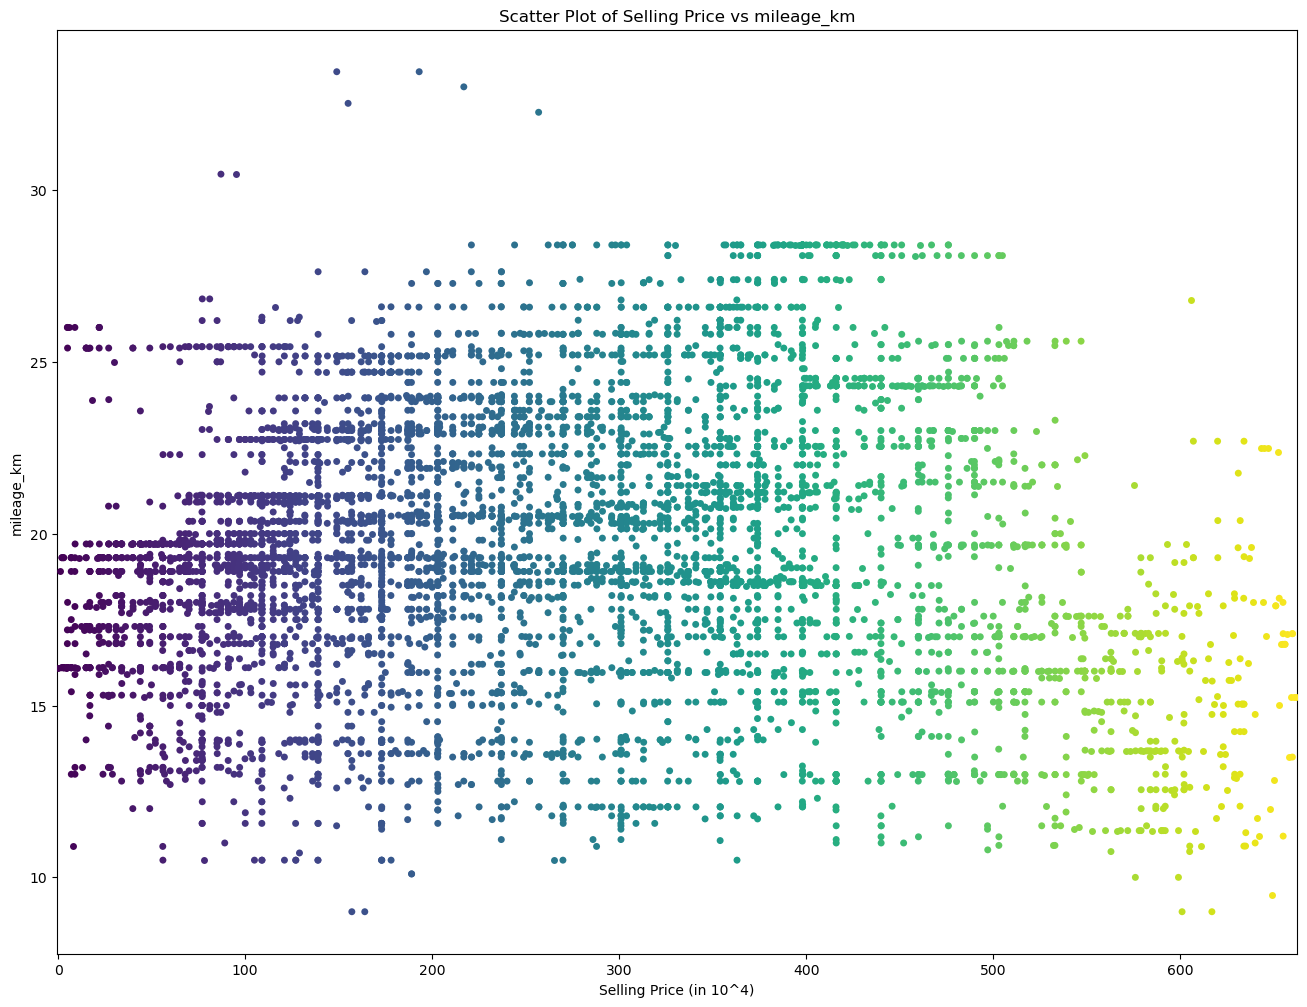

In [64]:
plt.figure(figsize=(16, 12))
sns.stripplot(y='mileage_km', x='selling_price', data=df, jitter=True, palette='viridis')
plt.xscale('linear')
plt.title("Scatter Plot of Selling Price vs mileage_km")
plt.xlabel("Selling Price (in 10^4)")
plt.ylabel("mileage_km")
plt.show()

## > Percentage of Number of Cars respective to Year built

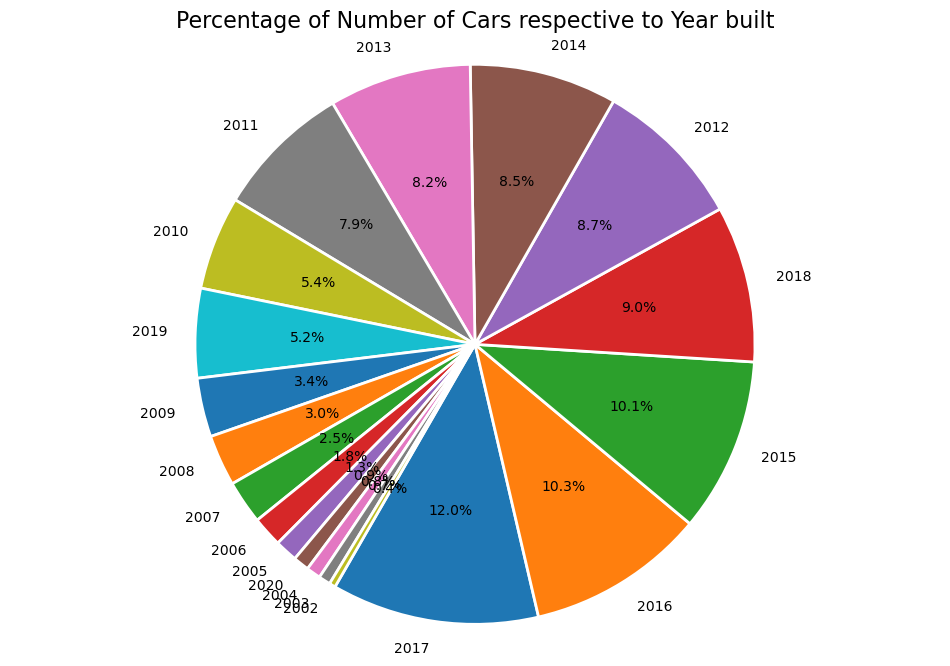

In [65]:
year_counts = df['year'].value_counts()
total_years = len(df)
percentages = (year_counts / total_years) * 100
plt.figure(figsize=(12, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=240,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

plt.title("Percentage of Number of Cars respective to Year built", fontsize=16)
plt.axis('equal')
plt.show()

## > Countplot of each type of Owner category

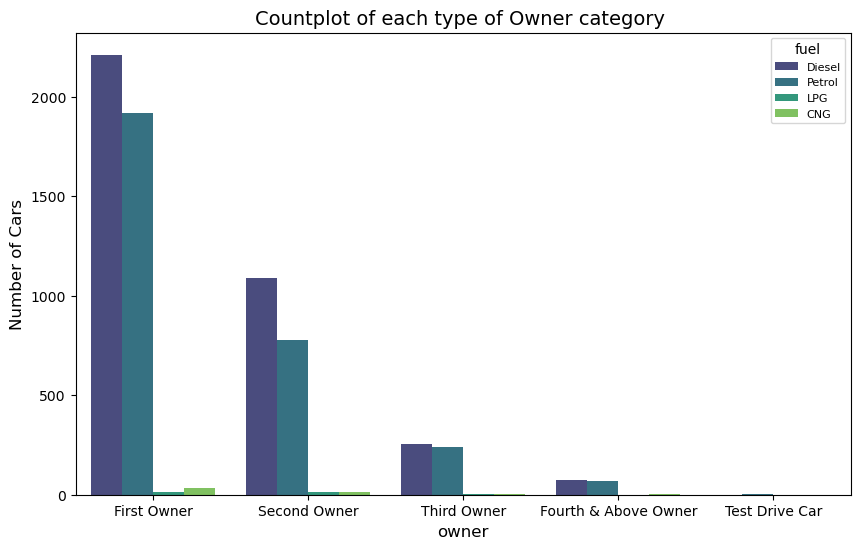

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = 'owner', hue='fuel', palette='viridis')
plt.xlabel("owner", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Countplot of each type of Owner category ", fontsize=14)
plt.legend(title='fuel', title_fontsize=10, fontsize=8)
plt.show()

## > Checking If Selling Price vary by Brand

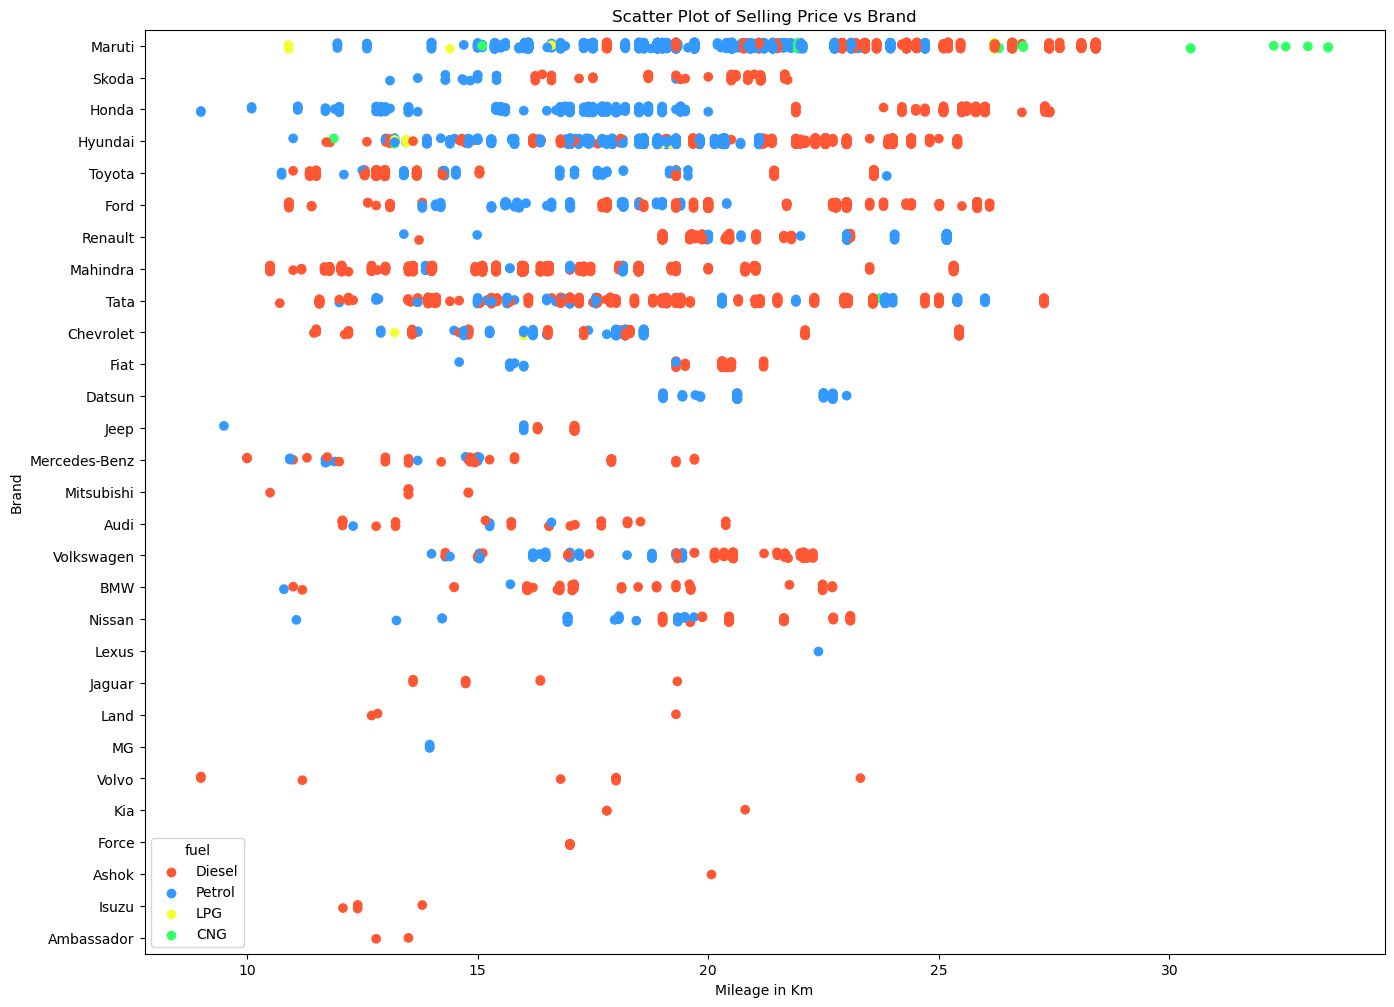

In [67]:
plt.figure(figsize=(16, 12))
custom_palette = ["#FF5733","#3399FF","#F1FF33","#33FF66"]
sns.stripplot(y='Brand', x='mileage_km', data=df, jitter=True, palette = custom_palette,hue='fuel',size = 7)
plt.xscale('linear')
plt.title("Scatter Plot of Selling Price vs Brand")
plt.xlabel("Mileage in Km")
plt.ylabel("Brand")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

## > Correlation between the Columns and dropping if highly Correlated

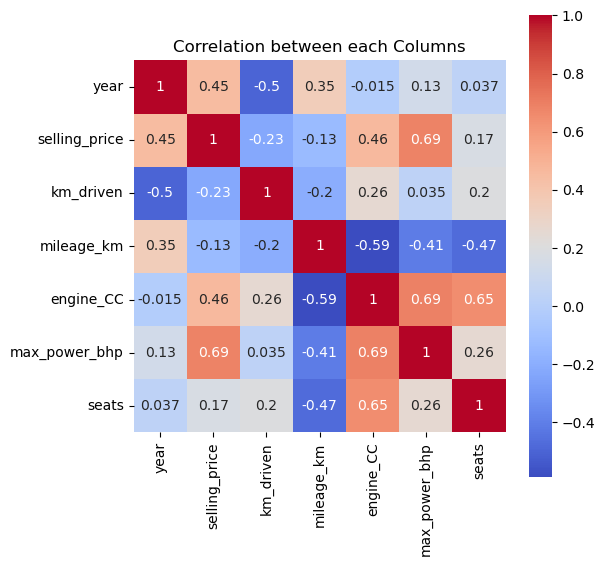

In [68]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',robust = True,square = True)
plt.title('Correlation between each Columns')
plt.show()

## Visualizing the spread of data between two categories

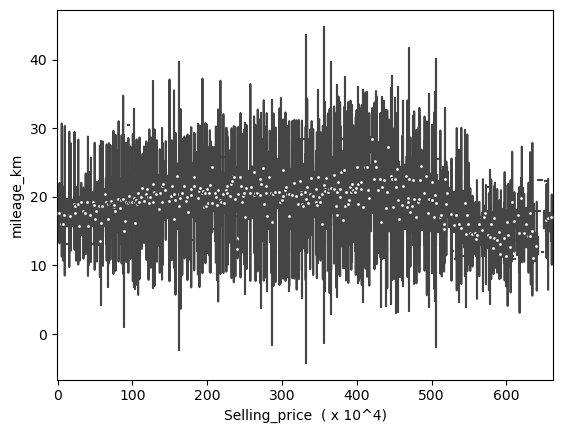

In [69]:
sns.violinplot(x='selling_price', y='mileage_km', data=df,)
plt.xscale('linear')
plt.xlabel('Selling_price  ( x 10^4)')
plt.show()

## > Average Selling Price by each Brand

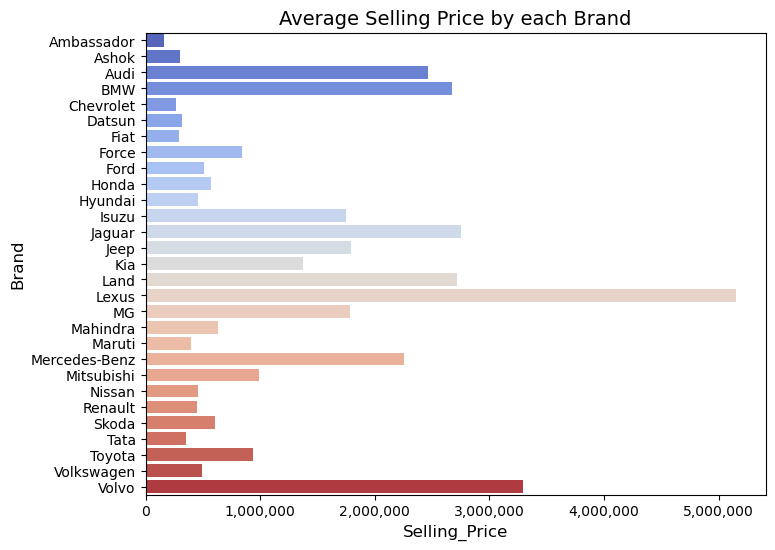

In [70]:
mean_values = df.groupby('Brand')['selling_price'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(y='Brand', x='selling_price', data=mean_values, palette='coolwarm')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xlabel("Selling_Price", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Average Selling Price by each Brand", fontsize=14)
plt.show()

## > Car brand vs Mileage 

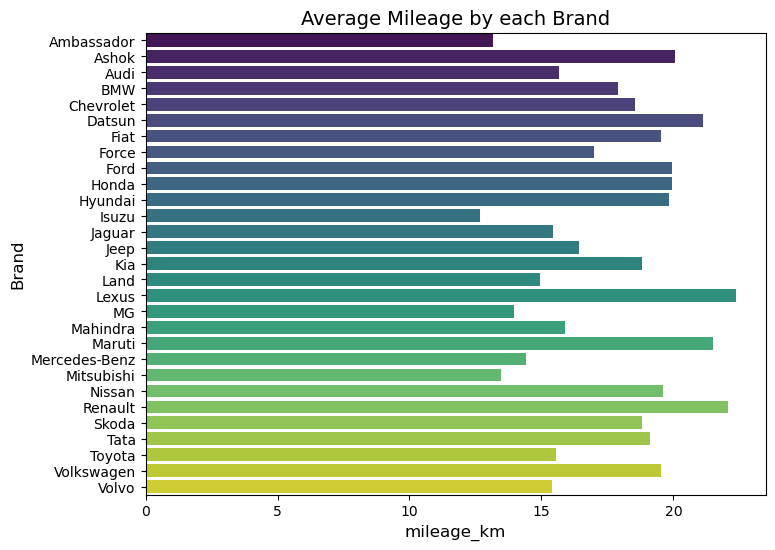

In [71]:
mean_values = df.groupby('Brand')['mileage_km'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(y='Brand', x='mileage_km', data=mean_values, palette = 'viridis' )
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xlabel("mileage_km", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Average Mileage by each Brand", fontsize=14)
plt.show()